<a href="https://colab.research.google.com/github/victorxbarbosa/analise-dos-dados-do-airbnb-sobre-edimburgo-esc-cia/blob/main/An%C3%A1lise_dos_dados_do_Airbnb_Edimburgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos dados do Airbnb | Edimburgo - Escócia

Para quem gosta de uma cidade com muita história, que tenha muitos restaurantes e pubs e que dê para conhecer e explorar o local a pé, Edimburgo é uma boa opção.
A capital da Escócia foi declarada **Patrimônio Mundial** pela UNESCO em 1995, sendo a segunda cidade mais visitada do Reino Unido, ficando atrás de Londres.

#Acomodação

Para conhecer essa cidade maravilhosa vamos precisar de um lugar para ficar. Pensando nisso, vamos optar pelo Airbnb com o bjetivo de buscar um imóvel que ofereça um ótimo custo benefício, com boa localização, boas avaliações. Também queremos observar quais são as regiões com os maiores e menores preços e qual imóvel é o mais alugado.

#Coletando os dados 

O [Inside Airbnb](http://insideairbnb.com/) é um conjunto independente de ferramentas e dados não comerciais que permite explorar como o Airbnb está realmente sendo usado nas cidades do mundo. 
* **listings.csv** - Summary information and metrics for listings in Edinburgh (good for visualisations).

In [ ]:
#importanto as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({"axes.grid":False,"font.size":14, "axes.spines.right":False,"axes.spines.top":False,"axes.titlelocation":"left"})

In [ ]:
#importando nosso conjunto de dados e criando um DataFrame
dados = "http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2022-03-14/visualisations/listings.csv"
df = pd.read_csv(dados)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,90,3,391,2022-03-13,2.88,1,205,51,NaN
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,228,2021-08-25,1.63,1,17,11,NaN
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,52,4,60,2022-03-13,0.64,2,243,4,NaN
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,37,2,216,2022-02-28,1.53,2,43,17,NaN
4,54188,The Four Sisters Boatel,253850,Natalie,NaN,Dalry and Fountainbridge,55.94217,-3.20863,Entire home/apt,164,1,37,2021-11-02,0.32,2,226,3,NaN


#Entendendo os dados
Vamos observar e entender os atributos do nosso dataset.

**Dicionário de atributos**

* `id` - número de identificação do imóvel
* `name` - nome do imóvel
* `host_id` - número de identificação do anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - grupo de bairros
* `neighbourhood` - nome dos bairros
* `latitude` - latitude
* `longitude` - longitude
* `room_type` - tipo de quarto para alugar
* `price` - preço
* `minimum_nights` - noites mínimas para alugar
* `number_of_reviews` - número de reviews do imóvel
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - número de imóveis do mesmo anfitrião
* `availability_365` - disponibilidade do imóvel nos 365 dias do ano
* `number_of_reviews_ltm` - número de reviews que o imóvel tem
* `license` - número de registro

Antes de começar nossa análise, vamos observar a "cara" do nosso dataset com as cinco primeiras entradas.

In [ ]:
#mostar as cinco primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,90,3,391,2022-03-13,2.88,1,205,51,NaN
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,228,2021-08-25,1.63,1,17,11,NaN
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,52,4,60,2022-03-13,0.64,2,243,4,NaN
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,37,2,216,2022-02-28,1.53,2,43,17,NaN
4,54188,The Four Sisters Boatel,253850,Natalie,NaN,Dalry and Fountainbridge,55.94217,-3.20863,Entire home/apt,164,1,37,2021-11-02,0.32,2,226,3,NaN


In [ ]:
#informações sobre nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6161 non-null   int64  
 1   name                            6161 non-null   object 
 2   host_id                         6161 non-null   int64  
 3   host_name                       6159 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6161 non-null   object 
 6   latitude                        6161 non-null   float64
 7   longitude                       6161 non-null   float64
 8   room_type                       6161 non-null   object 
 9   price                           6161 non-null   int64  
 10  minimum_nights                  6161 non-null   int64  
 11  number_of_reviews               6161 non-null   int64  
 12  last_review                     54

In [ ]:
#tamanho do nosso dataset (x,y) onde x é o número de entradas e y o número de variáveis
df.shape

(6161, 18)

In [ ]:
#porcentagem dos valores nulos
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False).to_frame()

,0
license,100.000000
neighbourhood_group,100.000000
reviews_per_month,11.150787
last_review,11.150787
host_name,0.032462
minimum_nights,0.000000
number_of_reviews_ltm,0.000000
availability_365,0.000000
calculated_host_listings_count,0.000000
number_of_reviews,0.000000


In [ ]:
df.dtypes.to_frame()

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [ ]:
#verificar a distribuição estatística de nossos dados
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.161000e+03,6161,6.161000e+03,6159,0.0,6161,6161.000000,6161.000000,6161,6161.000000,6161.000000,6161.000000,5474,5474.000000,6161.000000,6161.000000,6161.000000,0.0
unique,NaN,6091,NaN,1685,NaN,111,NaN,NaN,4,NaN,NaN,NaN,804,NaN,NaN,NaN,NaN,NaN
top,NaN,Mono Suites - One Bedroom Suite,NaN,Altido,NaN,"Old Town, Princes Street and Leith Street",NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-02-27,NaN,NaN,NaN,NaN,NaN
freq,NaN,7,NaN,121,NaN,771,NaN,NaN,4238,NaN,NaN,NaN,448,NaN,NaN,NaN,NaN,NaN
mean,1.956457e+16,NaN,1.188633e+08,NaN,NaN,NaN,55.950513,-3.198214,NaN,148.234540,4.715306,65.109398,NaN,1.670068,6.917870,130.510144,13.586918,NaN
std,1.029244e+17,NaN,1.226487e+08,NaN,NaN,NaN,0.015642,0.039405,NaN,466.300052,31.189858,97.768219,NaN,1.704875,16.390509,120.195784,19.972455,NaN
min,1.542000e+04,NaN,4.649800e+04,NaN,NaN,NaN,55.858160,-3.420200,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.627320e+07,NaN,2.092327e+07,NaN,NaN,NaN,55.942800,-3.211680,NaN,60.000000,1.000000,4.000000,NaN,0.400000,1.000000,11.000000,0.000000,NaN
50%,2.899886e+07,NaN,6.842726e+07,NaN,NaN,NaN,55.951040,-3.193030,NaN,90.000000,2.000000,24.000000,NaN,1.110000,2.000000,92.000000,4.000000,NaN
75%,4.369990e+07,NaN,1.929944e+08,NaN,NaN,NaN,55.959650,-3.178020,NaN,137.000000,3.000000,85.000000,NaN,2.430000,5.000000,237.000000,20.000000,NaN


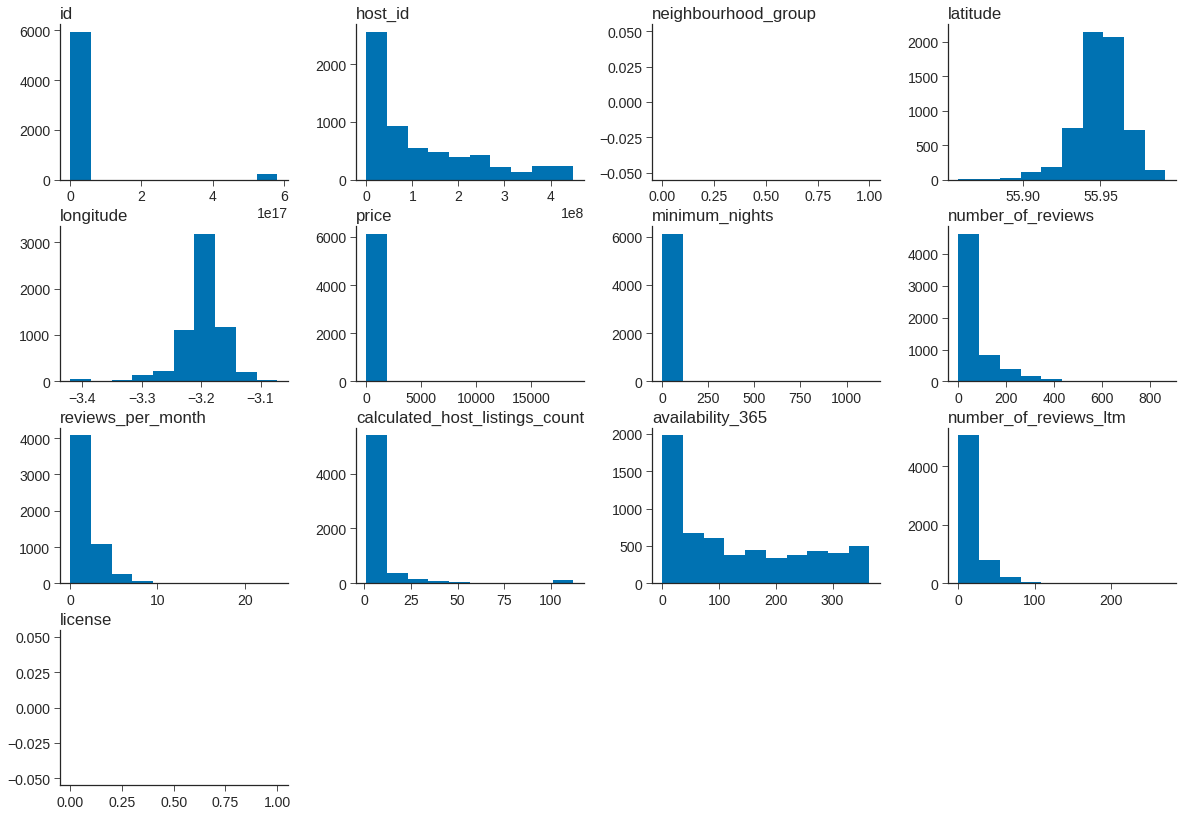

In [ ]:
#histograma da distribuição estatística de cada atributo
df.hist(figsize=(20,14), bins=10, grid=False);

#Preparando os dados
Nesta etapa vamos tratar os dados observando os valores nulos, outliers para fazer uma análise mais precisa.

###Verificando valores nulos

Logo no entendimento dos dados vemos que os atributos `neighbourdhood_group` e `license` não possuem dados, sendo assim, vamos excluir esses atributos de nosso dataset.

Os atributos `number_of_reviews` e `number_of_reviews_ltm` acabam sendo redundantes, por isso vou excluir o atributo `number_of_reviews_ltm` por conter menos dados.

Também vou excluir o atributo `last_review` pois não é relevante para a análise e vamos deixar o dataset mais limpo

In [ ]:
#criar uma cópia do nosso df para não ter problemas com as células anteriores
df_clean = df.copy()

#excluindo o atributo license
del df_clean["license"]

#excluindo o atributo neighbourhood_group
del df_clean['neighbourhood_group']

#exluindo number_of_reviews_ltm
del df_clean['number_of_reviews_ltm']

#exluindo last_review
del df_clean['last_review']

In [ ]:
#veja que as os atributos excluindo já não se encontram em nosso dataset
df_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

###Verificando outliers

Podemos perceber que os atributos `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month` e `calculated_host_listings_count` apresentam um valor máximo muito acima de 75% dos dados.

In [ ]:
df_clean.loc[:,['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,6161.000000,6161.000000,6161.000000,5474.000000,6161.000000
mean,148.234540,4.715306,65.109398,1.670068,6.917870
std,466.300052,31.189858,97.768219,1.704875,16.390509
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,60.000000,1.000000,4.000000,0.400000,1.000000
50%,90.000000,2.000000,24.000000,1.110000,2.000000
75%,137.000000,3.000000,85.000000,2.430000,5.000000
max,18825.000000,1124.000000,865.000000,23.720000,112.000000


#####Boxplot para price

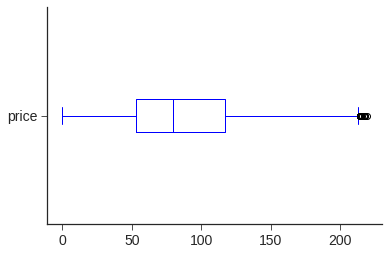

price com entradas acima de 220:
0 entradas
0.0000%


In [ ]:
#boxplot para price
fig, ax = plt.subplots()
df_clean.loc[df_clean["price"] < 220].boxplot(['price'], vert=False, ax=ax, grid=False, color='blue')
plt.show()

#verificando as entradas de price acima de 220
print("price com entradas acima de 220:")
print("{} entradas".format(len(df_clean[df_clean.price > 220])))
print("{:.4f}%".format((len(df_clean[df_clean.price > 220]) / df.shape[0])*100))

#####Boxplot para minimum_nights

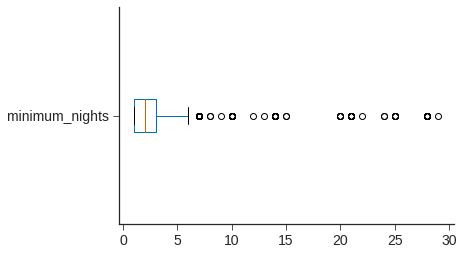

minimum_nights com entradas acima de 10:
169 entradas
2.7431%


In [ ]:
#boxplot para minimum_nights
fig, ax = plt.subplots()
df_clean.loc[df_clean['minimum_nights'] < 30].boxplot(['minimum_nights'], vert=False, ax=ax, grid=False)
plt.show()

#verificando as entradas de minimum_nights acima de 10
print("minimum_nights com entradas acima de 10:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > 10])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights > 10]) / df_clean.shape[0])*100))

#####Boxplot para number_of_reviews

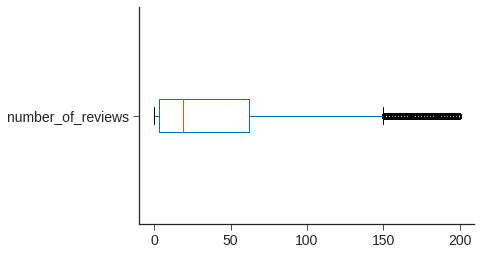

number_of_reviews com entradas acima de 150
861 entradas
13.9750%


In [ ]:
#boxplot para number_of_reviews
fig, ax = plt.subplots()
df_clean.loc[df_clean['number_of_reviews'] < 200].boxplot(['number_of_reviews'], vert=False, ax=ax, grid=False)
plt.show()

#verificando entradas para number_of_reviews acima de 150
print("number_of_reviews com entradas acima de 150")
print("{} entradas".format(len(df_clean[df_clean['number_of_reviews'] > 150])))
print("{:.4f}%".format((len(df_clean[df_clean['number_of_reviews'] > 150]) / df_clean.shape[0])*100))

#####Boxplot para reviews_per_month

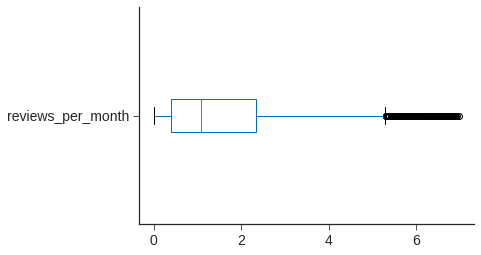

reviews_per_month com entradas acima de 5:
263 entradas
4.2688%


In [ ]:
#criando boxplot para reviews_per_month
fig, ax=plt.subplots()
df_clean.loc[df_clean['reviews_per_month'] < 7].boxplot(['reviews_per_month'], vert=False, ax=ax, grid=False)
plt.show()

#verificando entradas para reviews_per_month acima de 5
print("reviews_per_month com entradas acima de 5:")
print("{} entradas".format(len(df_clean[df_clean['reviews_per_month'] > 5])))
print("{:.4f}%".format((len(df_clean[df_clean['reviews_per_month'] > 5]) / df_clean.shape[0])*100))

#####Boxplot para calculated_host_listings_count

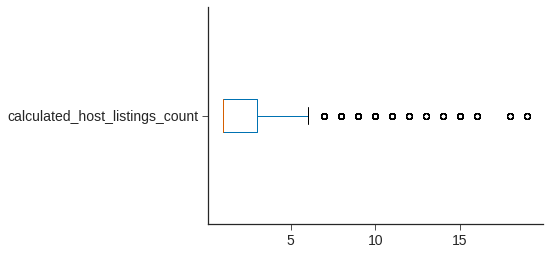

calculated_host_listings_count com entradas acima de 10:
897 entradas
14.5593%


In [ ]:
#criando boxplot
fig, ax = plt.subplots()
df_clean.loc[df_clean['calculated_host_listings_count'] < 20].boxplot(['calculated_host_listings_count'], vert=False, ax=ax, grid=False)
plt.show()

#verificando as entradas de calculated_host_listings_count acima de 10
print("calculated_host_listings_count com entradas acima de 10:")
print("{} entradas".format(len(df_clean[df_clean['calculated_host_listings_count'] > 10])))
print("{:.4f}%".format((len(df_clean[df_clean['calculated_host_listings_count'] > 10]) / df_clean.shape[0])*100))

Vamos eliminar estes outliers que encontramos para deixar nosso dataset mais limpo e prosseguir para uma análise mais precisa.

In [ ]:
#eliminando os outliers 
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 220].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 150].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 5].index, axis=0, inplace=True)

######Criando histograma com os dados modelados


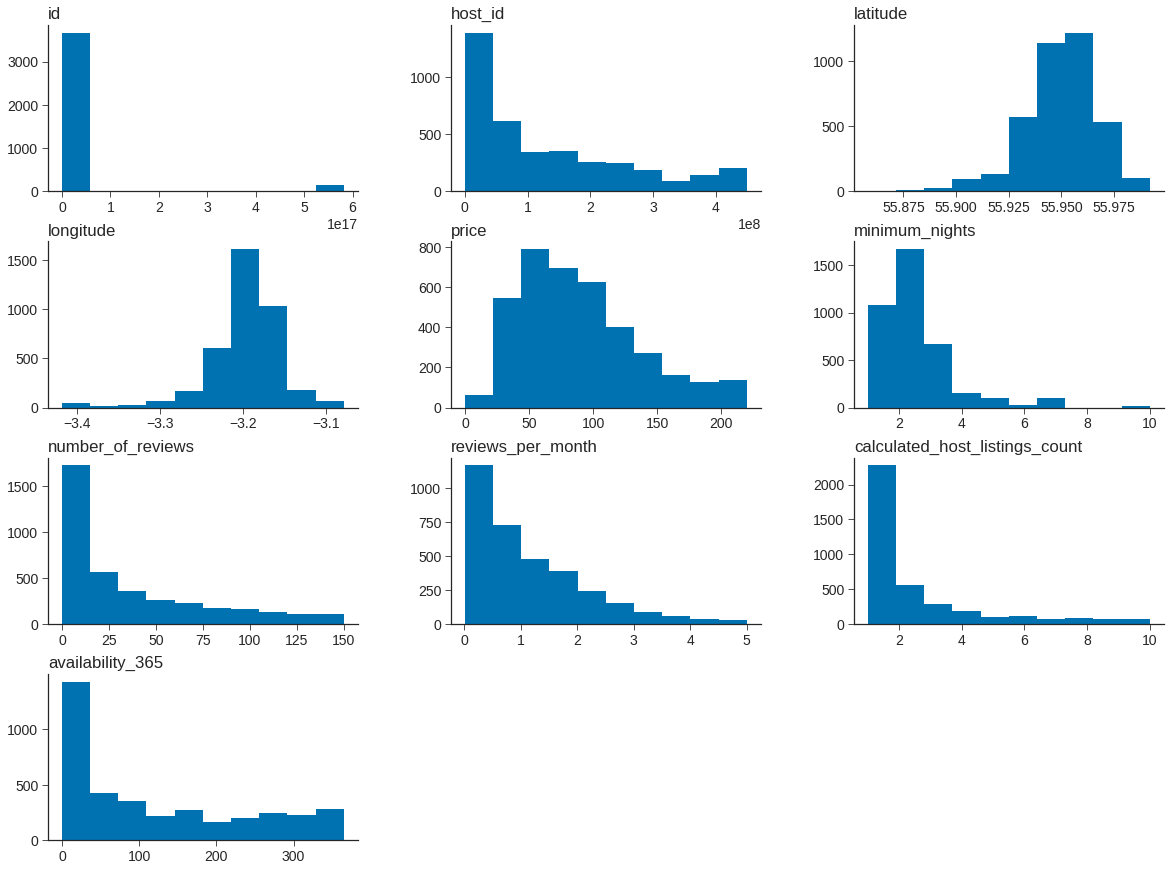

In [ ]:
df_clean.hist(figsize=(20,15), bins=10, grid=False);

#Análise dos dados

Agora com nossos dados modelados vamos começar a análise. Inicialmente vou plotar um gráfico de calor (heatmap), com o princípio de Pearson, para mostrar as relações entre os atributos.

In [ ]:
#criando matrix de correlação
corr = df_clean[['host_id','latitude','longitude','price','minimum_nights',	'number_of_reviews',	'reviews_per_month',	
                 'calculated_host_listings_count',	'availability_365']].corr()
corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,-0.019140,-0.035593,0.073380,-0.142660,-0.244342,0.147844,0.155443,0.118576
latitude,-0.019140,1.000000,0.098443,0.039742,0.037135,0.062383,0.043400,-0.051404,-0.034948
longitude,-0.035593,0.098443,1.000000,0.012613,0.022207,0.005218,0.003681,0.000288,-0.049191
price,0.073380,0.039742,0.012613,1.000000,0.067519,-0.071593,-0.051431,0.083846,0.153604
minimum_nights,-0.142660,0.037135,0.022207,0.067519,1.000000,-0.032395,-0.136656,-0.164569,-0.107191
number_of_reviews,-0.244342,0.062383,0.005218,-0.071593,-0.032395,1.000000,0.564008,-0.087109,0.018765
reviews_per_month,0.147844,0.043400,0.003681,-0.051431,-0.136656,0.564008,1.000000,0.022337,0.109116
calculated_host_listings_count,0.155443,-0.051404,0.000288,0.083846,-0.164569,-0.087109,0.022337,1.000000,0.188960
availability_365,0.118576,-0.034948,-0.049191,0.153604,-0.107191,0.018765,0.109116,0.188960,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


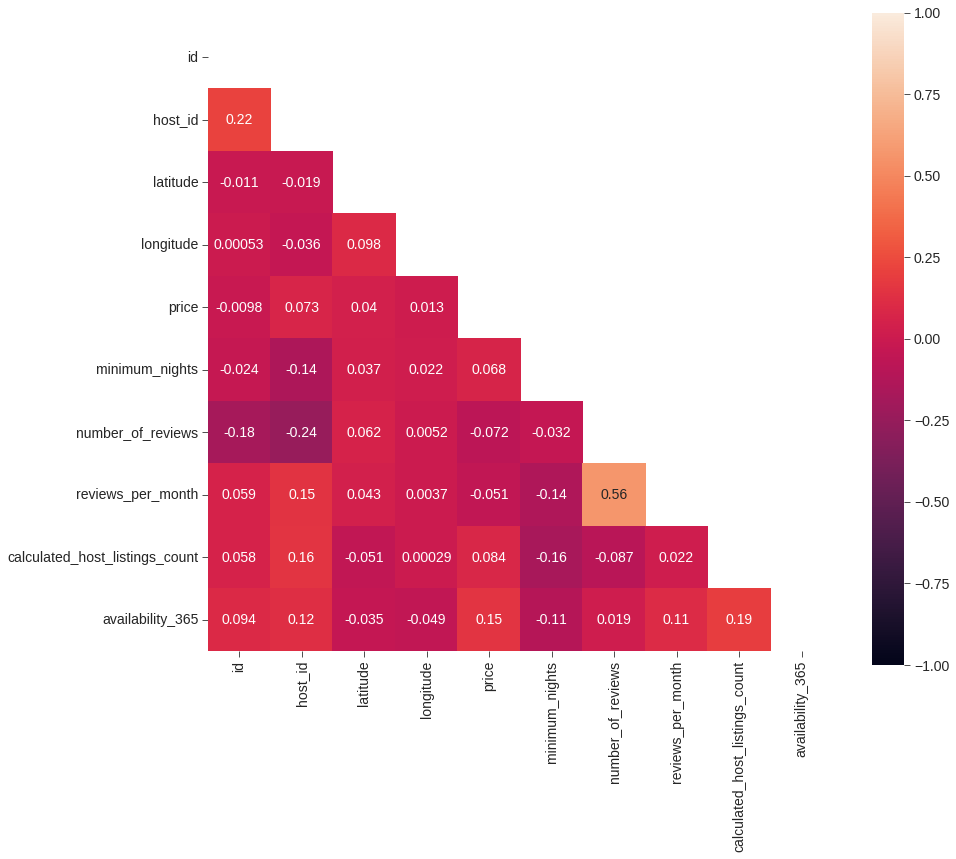

In [ ]:
mask=np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
plt.figure(figsize=(14,12))
sns.heatmap(df_clean.corr(), mask=mask, square=True, annot=True, vmin=-1,vmax=1)
plt.show();

Vemos que nenhuma que não existe nenhuma relação relevante para nossos objetivos entre os atributos.

#Qual é o tipo de imóvel mais alugado?

In [ ]:
#porcentagem dos tipos de quartos alugados
(((df_clean.room_type.value_counts()) / df_clean.shape[0])*100).to_frame()

,room_type
Entire home/apt,60.068081
Private room,38.308458
Hotel room,1.204504
Shared room,0.418958


In [ ]:
#quantidade de quartos alugados
df_clean.room_type.value_counts().to_frame()

,room_type
Entire home/apt,2294
Private room,1463
Hotel room,46
Shared room,16


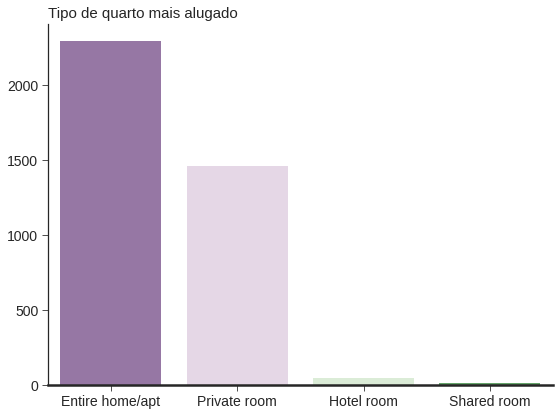

In [ ]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))

#criando o gráfico de barras
sns.barplot(x=df_clean.room_type.unique(), y=df_clean.room_type.value_counts(), ax=ax,  palette='PRGn')

#adicionando título
ax.set_title("Tipo de quarto mais alugado", fontdict={'fontsize':15})

#mudando e nome e tamanho do label x
ax.set_xlabel('')

#mudando tamanho do label eixo y
ax.set_ylabel('')

#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)

#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)

#otimizar espaço da figure
fig.tight_layout();

#Qual é o preço médio de aluguel de cada tipo de quarto?

In [ ]:
#Separando os tipos de quartos
eha = df_clean[df_clean['room_type'] == 'Entire home/apt']
pr = df_clean[df_clean['room_type'] == 'Private room']
ht = df_clean[df_clean['room_type'] == 'Hotel room']
sr = df_clean[df_clean['room_type'] == 'Shared room']

#definindo o preço médio

print(eha.price.mean(), pr.price.mean(),ht.price.mean(),sr.price.mean())

107.9768962510898 62.473684210526315 72.15217391304348 22.0


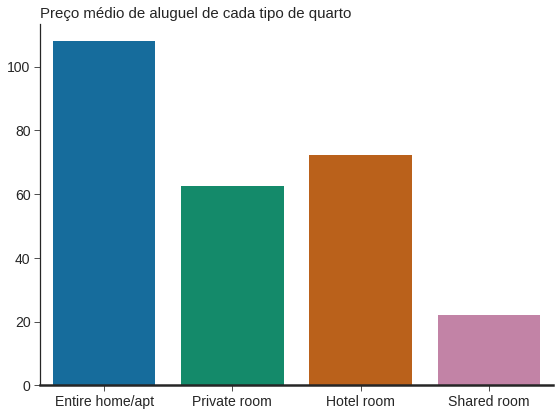

In [ ]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))

#criando o gráfico de barras
sns.barplot(x=df_clean.room_type.unique(), y=[eha.price.mean(),pr.price.mean(),ht.price.mean(),sr.price.mean()], ax=ax)

#adicionando título
ax.set_title("Preço médio de aluguel de cada tipo de quarto", fontdict={'fontsize':15})

#mudando e nome e tamanho do label x
ax.set_xlabel('')

#mudando tamanho do label eixo y
ax.set_ylabel('')

#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)

#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)

#otimizar espaço da figure
fig.tight_layout();

#Preço médio de aluguel em Edimburgo

In [ ]:
#imprimir o preço médio
print("O preço médio do aluguél é £", df_clean.price.mean())

O preço médio do aluguél é £ 89.75360041895784


#Quais são as 10 regiões mais caras

In [ ]:
#criar dicionário
dados = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].to_dict()
dados

{'Carrick Knowe': 125.0,
 'New Town West': 120.92222222222222,
 'Fernieside and Moredun South': 120.83333333333333,
 'Old Town, Princes Street and Leith Street': 113.43769968051119,
 'New Town East and Gayfield': 108.7,
 'Deans Village': 105.50549450549451,
 'Joppa': 103.5925925925926,
 'Western Harbour and Leith Docks': 102.89090909090909,
 'Canonmills and New Town North': 102.79629629629629,
 'Canongate, Southside and Dumbiedykes': 101.84}

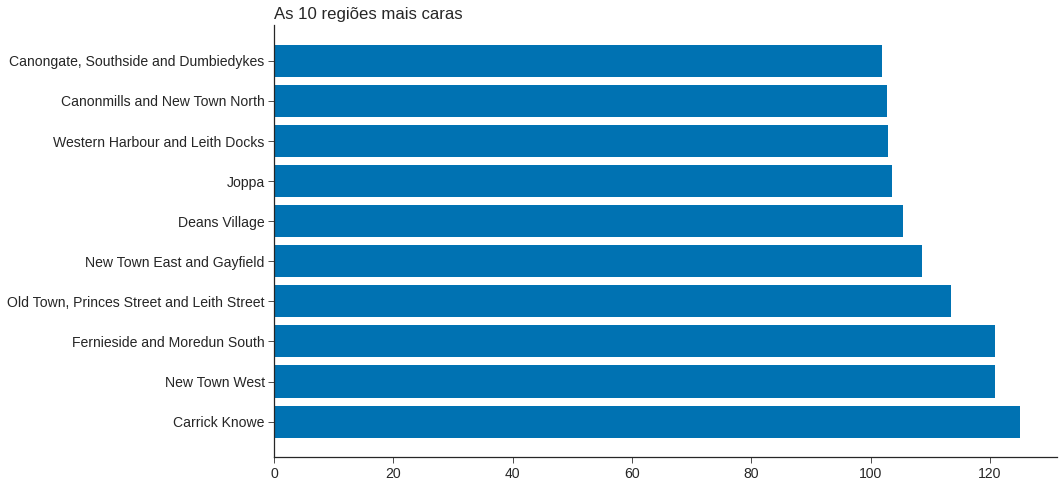

In [ ]:
#definir o gráfico
fig, ax = plt.subplots(figsize=(15,7))

#definir os dados
x = list(dados.values())
y = list(dados.keys())

#plotar o gráfico
ax.barh(y, x)
plt.title("As 10 regiões mais caras")
plt.style.use('seaborn-colorblind')

plt.tight_layout()

#Quais são as 10 regiões mais baratas

In [ ]:
#criar um dicionário
rb = df_clean.groupby(['neighbourhood']).price.mean().sort_values()[:10].to_dict
rb

<bound method Series.to_dict of neighbourhood
Murrayburn and Wester Hailes North       30.000000
Niddrie                                  31.125000
Clovenstone and Wester Hailes            32.714286
Parkhead and Sighthill                   37.400000
Bingham, Magdalene and The Christians    46.428571
Jewel, Brunstane and Newcraighall        47.000000
Currie East                              47.500000
Northfield and Piershill                 47.666667
Muirhouse                                48.416667
Currie West                              48.571429
Name: price, dtype: float64>

Text(0, 0.5, '')

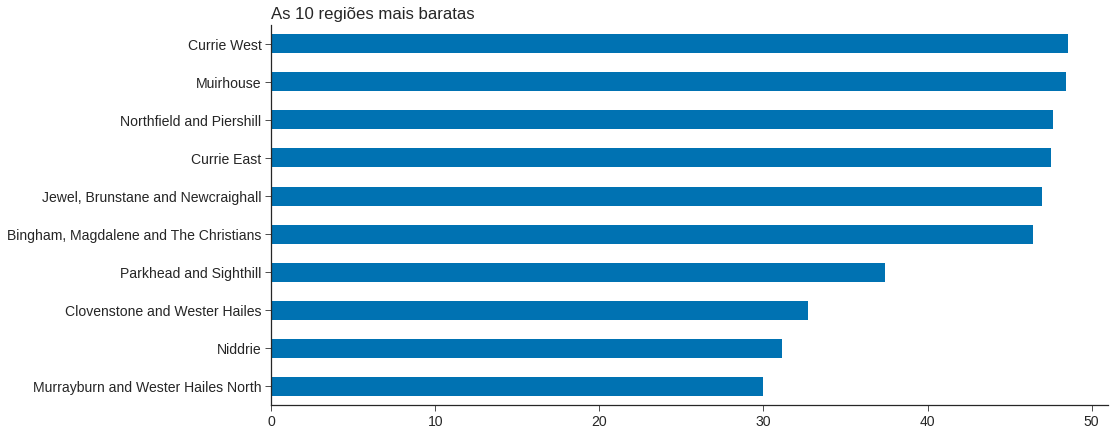

In [ ]:
#definir e plotar um gráfico
df_clean.groupby(['neighbourhood']).price.mean().sort_values()[:10].plot(kind='barh', figsize=(15,7), title='As 10 regiões mais baratas');
plt.ylabel('')

#Média de noites alugadas


In [ ]:
#imprimir a média de noites alugadas
print("Média de noites mínimas alugadas:",df_clean.minimum_nights.mean())

Média de noites mínimas alugadas: 2.263157894736842


#Os 10 quartos mais avaliados

In [ ]:
#mostrar os 10 quartos mais avaliados
dicionario = df_clean.number_of_reviews.sort_values(ascending=False)[:10].to_dict()
lista = list(dicionario.keys())
print(lista)


[2395, 1945, 1471, 2166, 1744, 1904, 1964, 2532, 88, 1105]


In [ ]:
df_clean[df_clean.index.isin(lista)].room_type.to_frame()

,room_type
88,Entire home/apt
1105,Entire home/apt
1471,Entire home/apt
1744,Entire home/apt
1904,Entire home/apt
1945,Private room
1964,Entire home/apt
2166,Entire home/apt
2395,Entire home/apt
2532,Private room


#Mapa de Edimburgo

In [ ]:
#instalar biblioteca folium
!pip install folium==0.10.1

#importar biblioteca
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pegando 100 entradas aleatórias do nosso dataset
df_mapa = df_clean.sample(100)

#variáveis necessárias
latitude = df_mapa.latitude.values
longitude = df_mapa.longitude.values

#definindo o mapa
edimburgo = folium.Map(location=[55.9411042,-3.4759298],
                 zoom_start=11)

#adicionando marcadores
for lat, lon in zip(latitude, longitude):
    folium.Marker(location=[float(lat), float(lon)]).add_to(edimburgo)

#plot mapa
edimburgo.save('edimburgo_map.html')
edimburgo

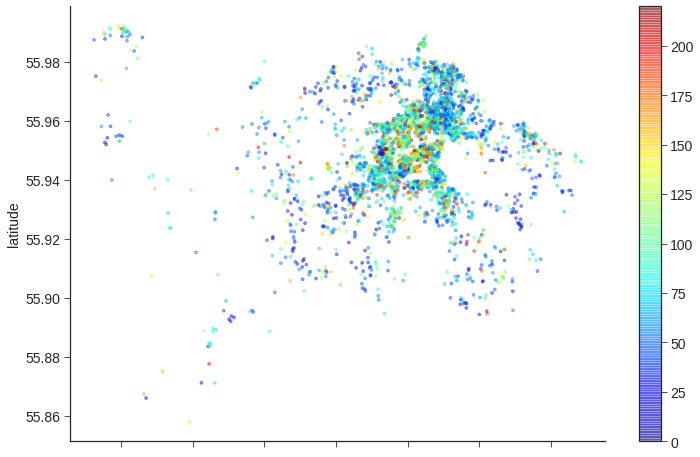

In [ ]:
#mapa de cluster
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
             cmap=plt.get_cmap('jet'), figsize=(12,8));

#Conclusão

Com nossa análise feita dos dados do Airbnb podemos tirar alguns inshigts:
*  60% das pessoas preferem alugar casa/apartamento.
* Há mais avaliações para casas/apartamentos.
* A média de noites minimas alugadas são de 2 noites.
* A média de alugel em Edimburgo por noite é £ 89.75
* A média de aluguel de casa/apartamento por noite é £ 107.97
* A média de um quarto por noite é £ 62.47
* A noite mais cara é em Carrick Knowe com £ 125.0
* A noite mais barata é em Murrayburn and Wester Hailes North com £ 30.0

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
